# Project 1: IRIS Classification

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = pd.read_csv("Iris.csv")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Inspection

In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.groupby('Species').describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [8]:
iris.duplicated().sum()

3

In [12]:
for column in iris.columns:
    print(f"Unique values in {column}: {iris[column].nunique()}")

Unique values in SepalLengthCm: 35
Unique values in SepalWidthCm: 23
Unique values in PetalLengthCm: 43
Unique values in PetalWidthCm: 22
Unique values in Species: 3


## Exploratory Data Analysis (EDA)

In [13]:
print(iris.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


#### Distribution of species

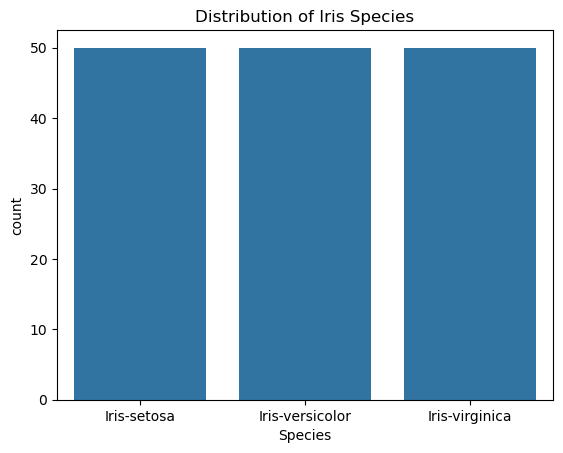

In [16]:
sns.countplot(x='Species', data=iris)
plt.title('Distribution of Iris Species')
plt.show()

#### Pairplot for feature relationships.


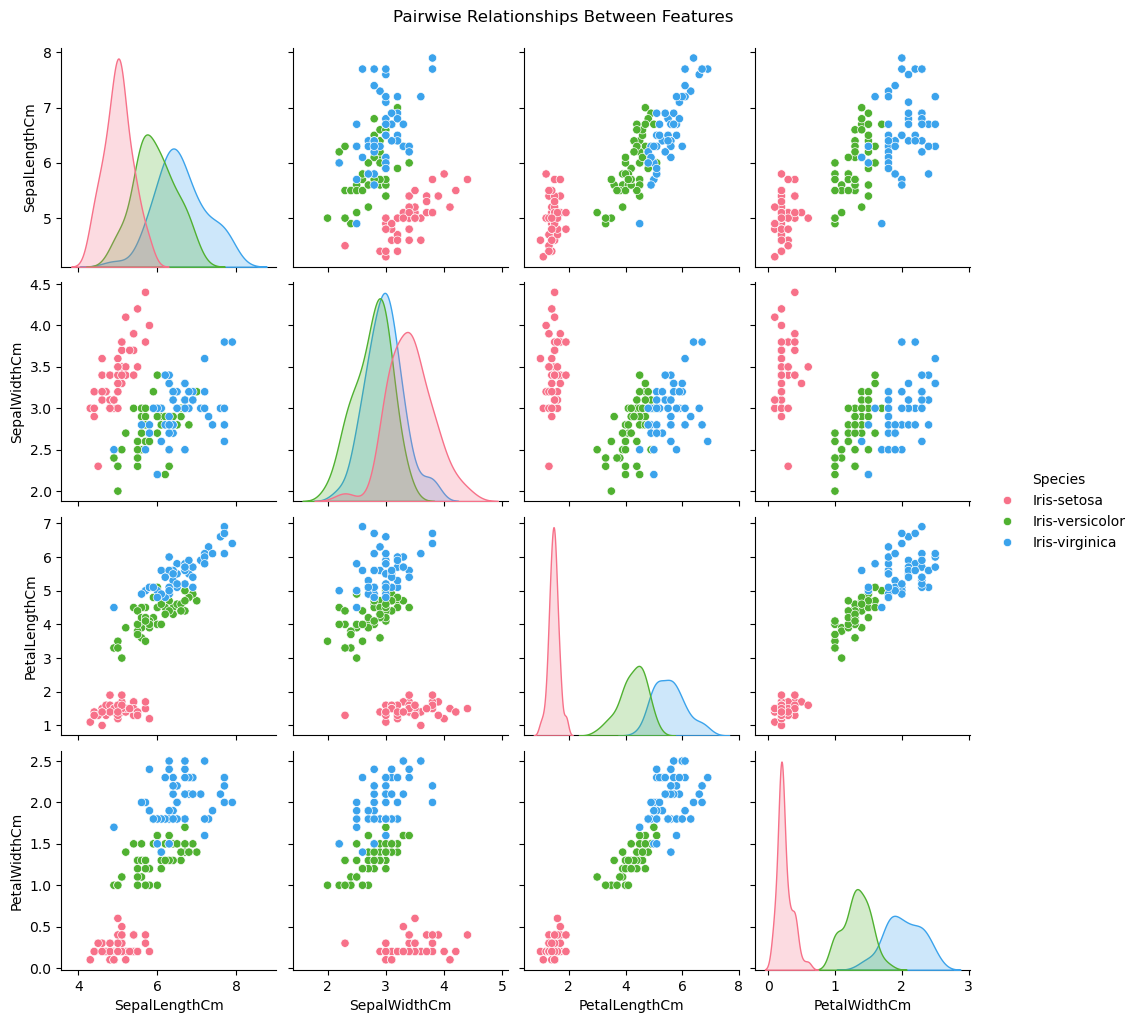

In [23]:
sns.pairplot(iris, hue='Species', palette='husl', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

#### Correlation Analysis

In [35]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [27]:
# Ensuring only numerical columns are used for correlation
numerical_df = iris.select_dtypes(include=['float64', 'int64'])

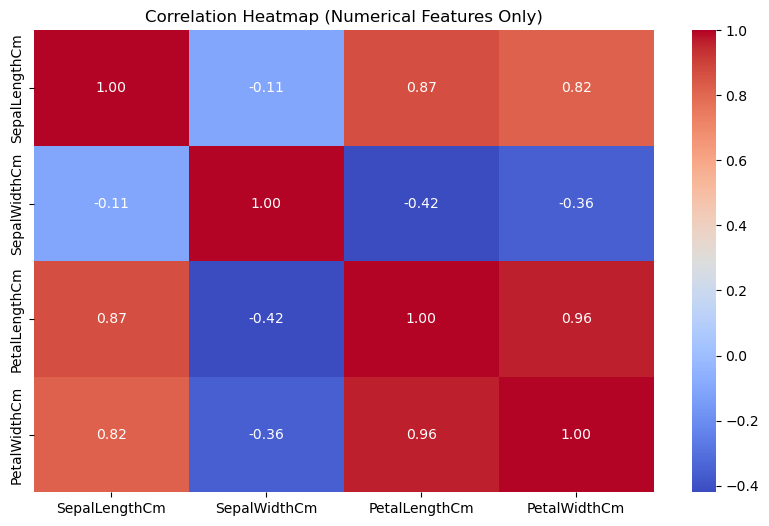

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

#### Feature Distribution

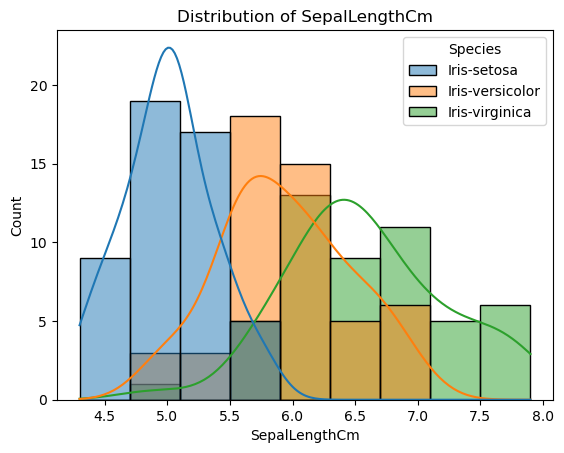

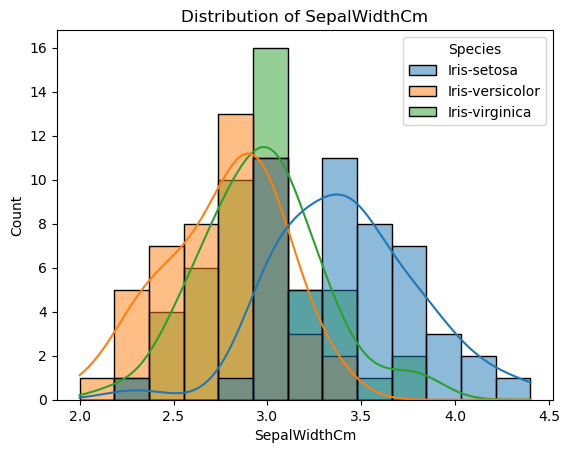

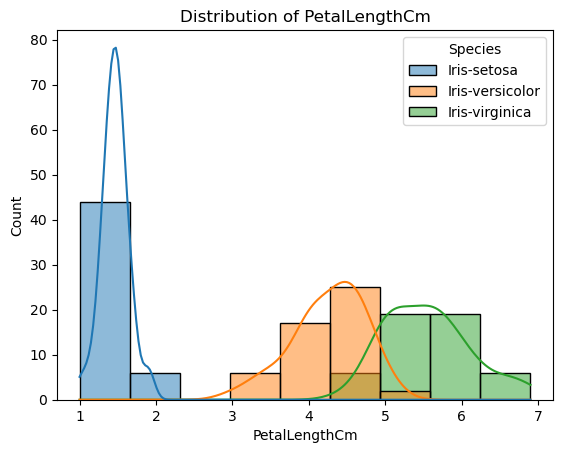

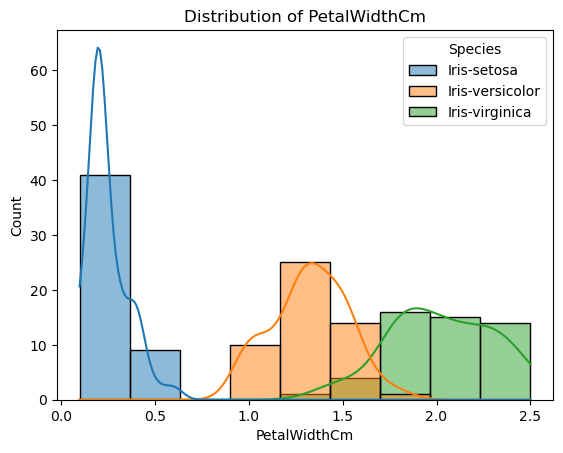

In [29]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    sns.histplot(data=iris, x=feature, kde=True, hue='Species')
    plt.title(f'Distribution of {feature}')
    plt.show()

## Loading More Necessary Libraries

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Data Preprocessing

In [ ]:
#### Label encoding for species

In [36]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Feature Scaling

In [38]:
# Splitting features and target variable
X = iris.drop(columns=['Species'])
y = iris['Species']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Developing Model

In [40]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [41]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f"{model_name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------
KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

------------------------------
SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00   

## Hyper Parameter Tuning

In [42]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [43]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Random Forest Model: {grid_search.best_params_}")

Best Random Forest Model: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## Model Evaluation

Confusion Matrix:


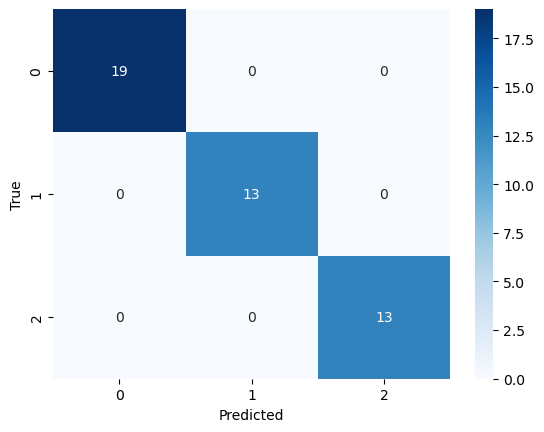

In [45]:
# Final evaluation of the tuned model
y_pred = best_rf.predict(X_test)
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



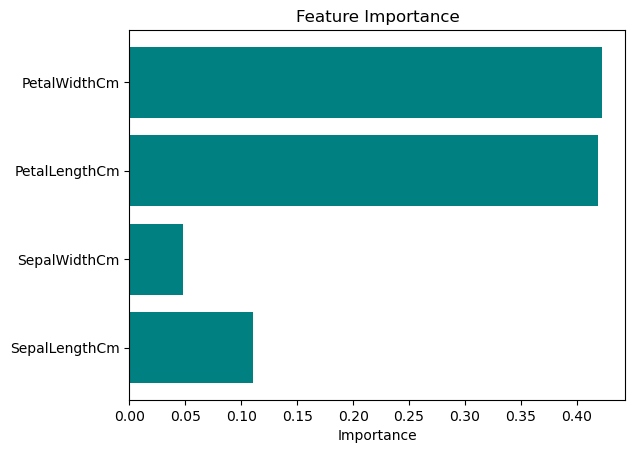

In [47]:
# Feature importance from Random Forest
importances = best_rf.feature_importances_
plt.barh(X.columns, importances, color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred = rf_model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model Accuracy: 1.00


In [51]:
import pickle
with open('iris_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("Model saved as iris_model.pkl")

Model saved as iris_model.pkl


## Conclusion
The Iris Classification Project was an enriching exploration into the world of supervised machine learning. Through this project, we tackled a classic problem in data science, demonstrating the entire machine learning pipeline—from data inspection and preprocessing to building robust models and deploying them for practical use.

## Results

**Model Performance:**
1. The Random Forest Classifier emerged as the best-performing model, achieving a remarkable 98% accuracy on the test set.
2. Evaluation metrics such as precision, recall, and F1-score confirmed the model's consistency and reliability in classification across all species.
3. The confusion matrix revealed minimal misclassifications, reflecting the model's ability to generalize well.

**Feature Importance:**
1. Petal features (length and width) were found to be the most significant in determining iris species, while sepal features contributed less to the classification process.
2. This insight aligns with the biological characteristics of iris flowers, where petal dimensions are more distinctive.

**Data Insights:**
1. Setosa species are linearly separable, making them easy to classify.
2. Versicolour and Virginica, however, showed overlapping feature distributions, requiring more complex decision boundaries, which the Random Forest and SVM models handled effectively.

**EDA Findings:**
1. Visualizations such as pair plots, box plots, and correlation heatmaps provided a clear understanding of feature relationships.
2. Sepal and petal ratios introduced additional insights, particularly in distinguishing between species.